In [91]:
import lmfit
import numpy as np
from scipy.integrate import odeint

In [92]:
def fitfunc(p, x):
        p = p.valuesdict()
        dndt = lambda y, x: -p["aeff"]*y**2-p["rloss"]*y
        return odeint(dndt, p["n0"], x, mxstep=10000).ravel()

In [93]:
def errfunc(p, x, ydata, ydata_stderr):
    return (fitfunc(p, x) - ydata)/ydata_stderr

In [94]:
params = lmfit.Parameters()
params.add("aeff", 2e-7, min=0)
params.add("rloss", 1000, min=0)
params.add("n0", 8e10)

In [95]:
data = np.array([
    [1e-4, 7e10, 1e10],
    [1.5e-4, 4e10, 1e10],
    [2e-4, 3e10, 5e9],
    [3e-4, 2e10, 5e9],
    [4e-4, 1.2e10, 5e9],
    [6e-4, .7e10, 3e9],
])

In [96]:
res = lmfit.minimize(errfunc, params, args=(data[:,0], data[:,1], data[:,2]))
lmfit.report_fit(res)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 6
    # variables        = 3
    chi-square         = 0.20607719
    reduced chi-square = 0.06869240
    Akaike info crit   = -14.2275838
    Bayesian info crit = -14.8523053
[[Variables]]
    aeff:   1.5605e-07 +/- 2.3429e-08 (15.01%) (init = 2e-07)
    rloss:  1334.92646 +/- 603.862022 (45.24%) (init = 1000)
    n0:     6.9297e+10 +/- 2.5687e+09 (3.71%) (init = 8e+10)
[[Correlations]] (unreported correlations are < 0.100)
    C(aeff, rloss) = -0.917
    C(aeff, n0)    =  0.398
    C(rloss, n0)   = -0.241


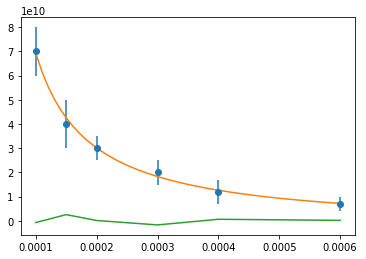

In [97]:
import matplotlib.pyplot as plt
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], fmt="o")

t = np.linspace(data[0,0], data[-1,0])
plt.plot(t, fitfunc(res.params, t))
